In [7]:
import glob # For getting file names
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
# import seaborn as sns
# import torch

from collections import Counter
# from gap_statistic import OptimalK
from scipy import stats, cluster
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

from utils.clustering_utils import *
from utils.conformal_utils import *
from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run

In [2]:
# # Enron - BERT (n_train=500)
# softmax_path = "../class-conditional-conformal-datasets/notebooks/.cache/email_softmax_bert_ntrain=500.npy"
# labels_path = "../class-conditional-conformal-datasets/notebooks/.cache/email_labels_bert_ntrain=500.npy"
# save_folder = '.cache/paper/enron'

# ImageNet
softmax_path = '/home/tding/data/finetuned_imagenet/imagenet_train_subset_softmax.npy'
labels_path = '/home/tding/data/finetuned_imagenet/imagenet_train_subset_labels.npy'
save_folder = '.cache/paper/imagenet'

# # CIFAR-100
# softmax_path = "../class-conditional-conformal-datasets/notebooks/.cache/best-cifar100-model-valsoftmax_frac=0.3.npy"
# labels_path = "../class-conditional-conformal-datasets/notebooks/.cache/best-cifar100-model-vallabels_frac=0.3.npy"
# save_folder = '.cache/paper/cifar100'
 
# SETTINGS
alpha = .1
n_totalcal_list = [10, 30]
score_function_list = ['softmax', 'APS', 'RAPS']
seeds = [0,1,2,3,4,5,6,7,8,9]

In [3]:
softmax_scores = np.load(softmax_path)
labels = np.load(labels_path)

run_experiment(softmax_scores, labels,
                  save_folder,
                  alpha=alpha,
                  n_totalcal_list=n_totalcal_list,
                  score_function_list=score_function_list,
                  seeds=seeds)

====== score_function=softmax ======
Computing conformal score...

seed=0
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [270, 261, 235, 234]
Heuristic chose n_clustering=9, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [270, 261, 235, 234]
Saved results to .cache/paper/imagenet/n_totalcal=10/score=softmax/seed=0_allresults.pkl

seed=1
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [289, 267, 266, 178]
Heuristic chose n_clustering=9, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [289, 267, 266, 178]
Saved results to .cache/paper/imagenet/n_totalcal=10/score=softmax/seed=1_allresults.pkl

seed=2
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [288, 274, 244, 194]
Heuristic chose n_clustering=9, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [288, 274, 244, 194]
Saved results to .cache/

Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [515, 451, 32, 2]
Heuristic chose n_clustering=9, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [515, 451, 32, 2]
Saved results to .cache/paper/imagenet/n_totalcal=10/score=RAPS/seed=6_allresults.pkl

seed=7
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [418, 312, 221, 49]
Heuristic chose n_clustering=9, num_clusters=4
p=0.98 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/imagenet/n_totalcal=10/score=RAPS/seed=7_allresults.pkl

seed=8
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [533, 420, 45, 2]
Heuristic chose n_clustering=9, num_clusters=4
p=0.26 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/imagenet/n_totalcal=10/score=RAPS/seed=8_allresults.pkl

seed=9
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [435, 280, 259, 26]
Heuristic 

Heuristic chose n_clustering=27, num_clusters=13
p=0.01 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/imagenet/n_totalcal=30/score=APS/seed=6_allresults.pkl

seed=7
Heuristic chose n_clustering=27, num_clusters=13
Cluster sizes: [122, 118, 102, 101, 92, 85, 77, 68, 66, 45, 45, 45, 34]
Heuristic chose n_clustering=27, num_clusters=13
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [122, 118, 102, 101, 92, 85, 77, 68, 66, 45, 45, 45, 34]
Saved results to .cache/paper/imagenet/n_totalcal=30/score=APS/seed=7_allresults.pkl

seed=8
Heuristic chose n_clustering=27, num_clusters=13
Cluster sizes: [135, 111, 104, 92, 79, 77, 75, 74, 63, 62, 61, 39, 28]
Heuristic chose n_clustering=27, num_clusters=13
p=0.01 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/imagenet/n_totalcal=30/score=APS/seed=8_allresults.pkl

seed=9
Heuristic chose n_clustering=27, num_clusters=13
Cl

In [4]:
for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        print(f'===== n_totalcal={n_totalcal}, score={score} =====')
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        average_results_across_seeds(folder)

===== n_totalcal=10, score=softmax =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [5.17236148 5.18916208 5.22015709 5.38260538 5.11198061 5.17708895
 5.26768849 5.29884609 5.10262053 5.34641107]
  classwise: [6.47692393 6.85546245 6.52130369 6.35961778 6.38420915 6.55367594
 6.68110541 6.48724212 6.57492032 6.62963121]
  smart_cluster: [4.70409121 4.37329109 4.28200552 4.93581411 4.46080025 4.46671051
 4.34517304 4.783212   4.22373248 4.0433306 ]
  always_cluster: [4.70409121 4.37329109 4.28200552 4.93581411 4.46080025 4.46671051
 4.34517304 4.783212   4.22373248 4.0433306 ]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,5.226892,0.089969,38.306105,1.251245,1.937735,0.060146
1,classwise,6.552409,0.138292,41.471177,4.527139,24.847058,3.356368
2,smart_cluster,4.461816,0.259284,26.717701,4.550845,2.949315,0.757161
3,always_cluster,4.461816,0.259284,26.717701,4.550845,2.949315,0.757161


===== n_totalcal=10, score=APS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [2.57675357 2.56113191 2.55033836 2.57586821 2.62641054 2.56678925
 2.56526607 2.57120108 2.55841494 2.54419397]
  classwise: [6.66867038 6.68652184 6.59818406 6.37192727 6.6274138  6.89962569
 6.36091934 6.64830207 6.75078255 6.37934148]
  smart_cluster: [2.57675357 2.56113191 2.55033836 2.57586821 2.62641054 2.99611186
 2.56526607 2.57120108 2.55841494 2.54419397]
  always_cluster: [3.16052269 2.77502974 2.9143469  2.7630254  2.94784841 2.99611186
 3.09414456 2.94634229 3.195341   2.96747413]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,2.569637,0.021355,21.406518,0.522804,25.561331,0.750017
1,classwise,6.599169,0.169015,44.208482,2.634571,78.582012,4.145957
2,smart_cluster,2.612569,0.129615,22.139598,2.226901,25.566930,0.751044
3,always_cluster,2.976019,0.137046,20.784339,3.043966,28.791715,1.985610


===== n_totalcal=10, score=RAPS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [3.0348912  3.02635744 3.00923618 3.00628956 3.08743539 3.04595119
 3.02358455 3.00496051 3.04221636 3.0193219 ]
  classwise: [6.64037578 6.85506069 6.4270678  6.45412424 6.62853536 6.79962041
 6.2228862  6.49974479 6.62571115 6.54039933]
  smart_cluster: [3.0348912  3.02635744 3.00923618 3.00628956 3.08743539 3.16682028
 2.85511873 3.00496051 3.04221636 3.0193219 ]
  always_cluster: [3.02569059 3.28545139 2.87247723 3.13474623 3.04628089 3.16682028
 2.85511873 2.99797333 3.11311165 3.49090704]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,3.030024,0.023484,25.417025,0.599985,5.141688,0.075216
1,classwise,6.569353,0.174820,44.177114,1.958021,36.732655,2.864136
2,smart_cluster,3.025265,0.073688,24.921082,1.267894,5.413645,0.601036
3,always_cluster,3.098858,0.179884,21.171795,2.480768,6.398092,1.138982


===== n_totalcal=30, score=softmax =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [5.14407447 5.21226354 5.26482418 5.22214843 5.13584287 5.24115119
 5.2998563  5.22169323 5.22875729 5.28791369]
  classwise: [4.18069508 4.34562735 4.11016324 4.15936835 4.08216827 4.12870757
 4.14317198 4.13962323 4.09779867 4.17969781]
  smart_cluster: [3.31457517 3.42287244 3.45482145 3.17941014 3.64659368 3.27774096
 3.33217889 3.42758133 3.47480317 3.53963202]
  always_cluster: [3.31457517 3.42287244 3.45482145 3.17941014 3.64659368 3.27774096
 3.33217889 3.42758133 3.47480317 3.53963202]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,5.225853,0.051083,38.215223,0.616720,1.939136,0.036383
1,classwise,4.156702,0.070181,23.080164,3.566490,5.795095,0.336304
2,smart_cluster,3.407021,0.128531,18.895543,2.346407,2.678786,0.164535
3,always_cluster,3.407021,0.128531,18.895543,2.346407,2.678786,0.164535


===== n_totalcal=30, score=APS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [2.62432929 2.61921919 2.59313352 2.60681769 2.61397545 2.62220601
 2.60220106 2.62567526 2.62870768 2.61112583]
  classwise: [4.20236509 4.2612841  4.17214994 4.37702637 4.27302338 4.21507308
 4.08625641 4.13711329 4.1732344  4.11954953]
  smart_cluster: [2.62432929 2.56823067 2.68897615 2.58003834 2.88646529 2.57728979
 2.60220106 2.51944789 2.62870768 2.61112583]
  always_cluster: [2.69550168 2.56823067 2.68897615 2.58003834 2.88646529 2.57728979
 2.78774414 2.51944789 2.69148833 2.85398805]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,2.614739,0.010876,20.554537,0.149323,26.108780,0.273935
1,classwise,4.201708,0.080924,23.878007,4.912887,42.059657,1.165043
2,smart_cluster,2.628681,0.095765,19.345686,2.277268,27.132691,1.084799
3,always_cluster,2.684917,0.119804,19.001901,2.770175,27.572472,1.269917


===== n_totalcal=30, score=RAPS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [3.02380013 3.03436033 3.03547409 3.02978841 3.05305695 3.04027282
 3.00529052 3.04024726 3.03556858 3.01321761]
  classwise: [4.48270629 4.38647149 4.20524872 4.3090083  4.19369064 4.26492536
 4.28821541 4.33002161 4.1516458  4.28301345]
  smart_cluster: [3.02380013 2.92358391 3.03547409 2.84763458 2.77712424 2.77797177
 2.71968047 3.04024726 3.03556858 2.7458273 ]
  always_cluster: [2.92158942 2.92358391 2.64177798 2.84763458 2.77712424 2.77797177
 2.71968047 3.10923584 2.8115013  2.7458273 ]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,3.031108,0.013193,24.820647,0.259535,5.175459,0.035915
1,classwise,4.289495,0.092024,24.442489,2.639926,10.468599,0.552432
2,smart_cluster,2.892691,0.126793,21.024304,3.471047,6.201783,1.052860
3,always_cluster,2.827593,0.124860,17.944850,2.300678,6.752931,0.816408


Number of seeds found: 10


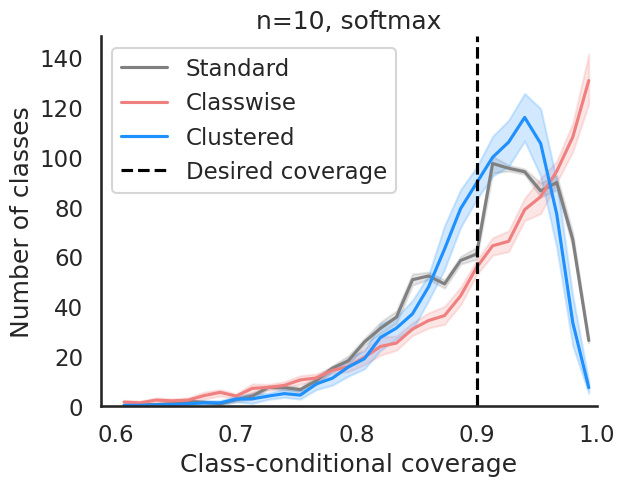

Number of seeds found: 10


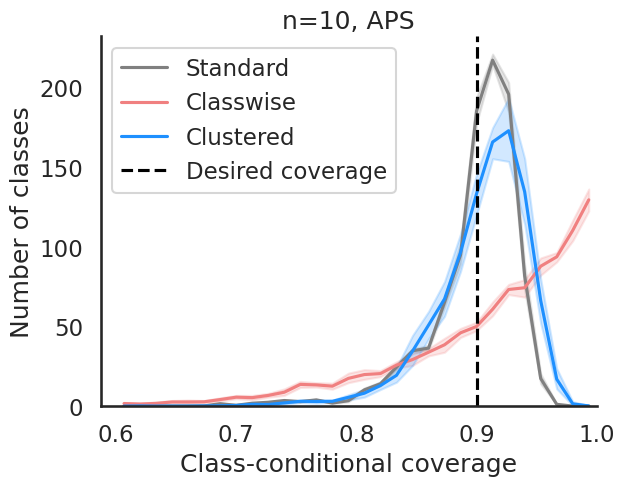

Number of seeds found: 10


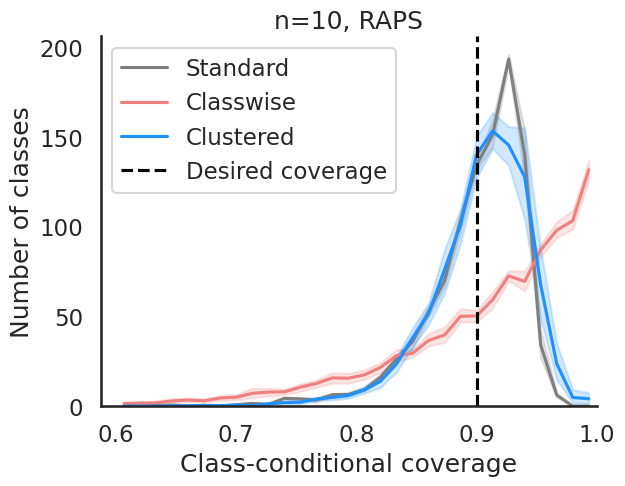

Number of seeds found: 10


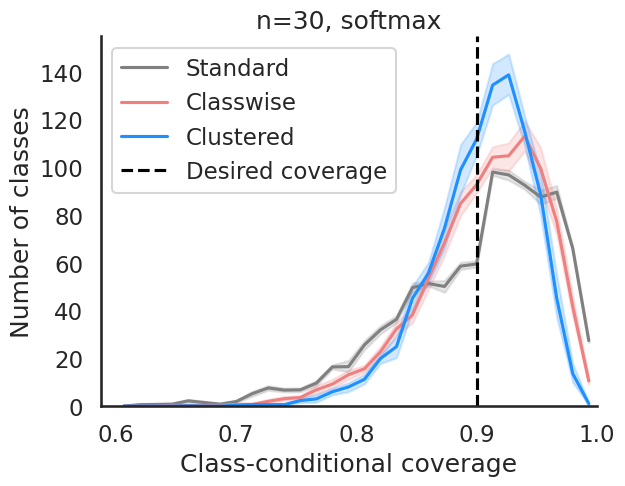

Number of seeds found: 10


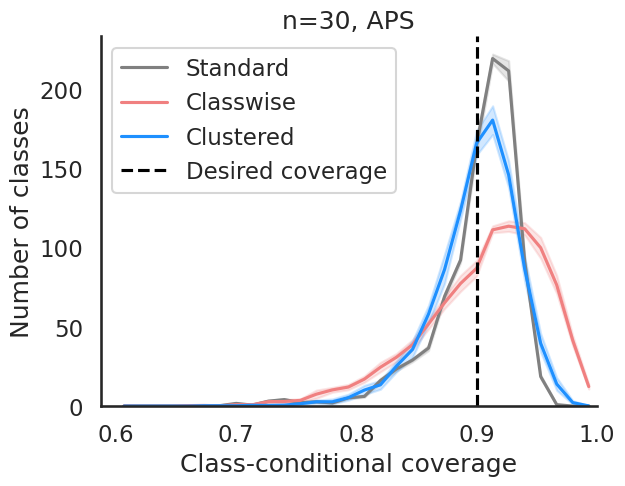

Number of seeds found: 10


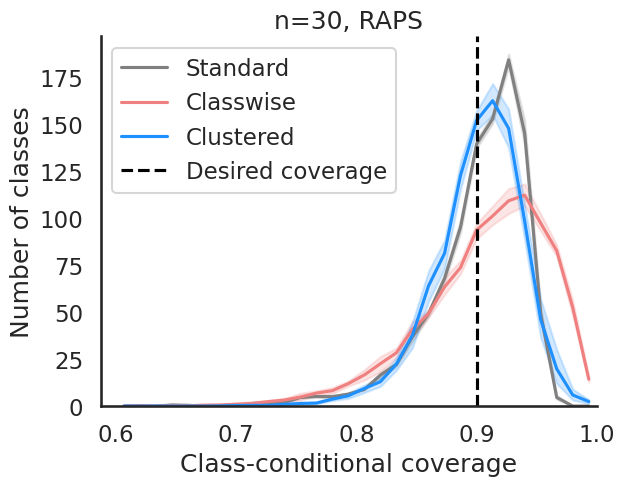

In [15]:
# Plot histograms of class coverage

for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        plot_class_coverage_histogram(folder, desired_cov=1-alpha, vmin=.6, vmax=1, nbins=30, title=f'n={n_totalcal}, {score}')

Number of seeds found: 10


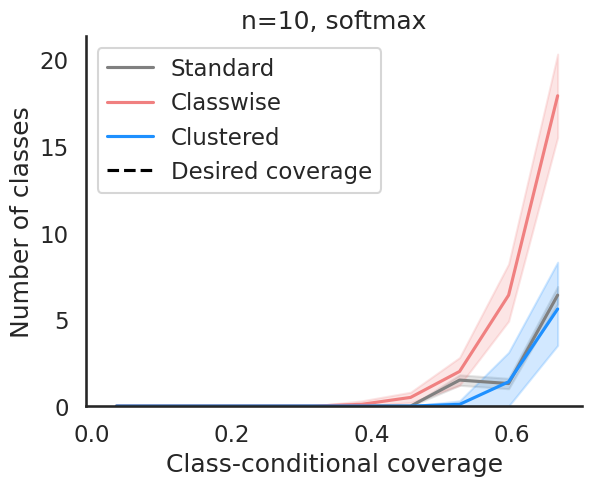

Number of seeds found: 10


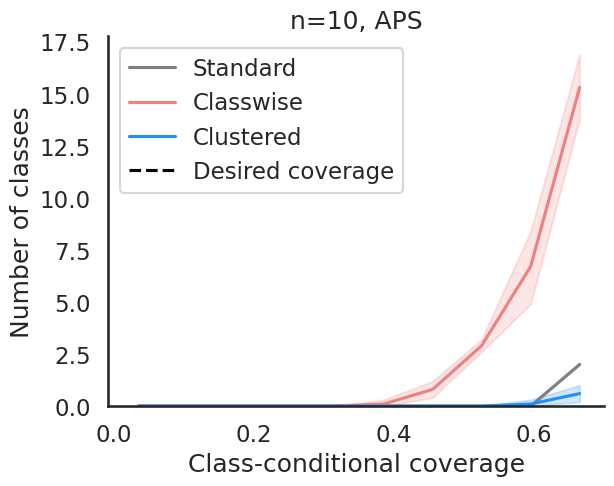

Number of seeds found: 10


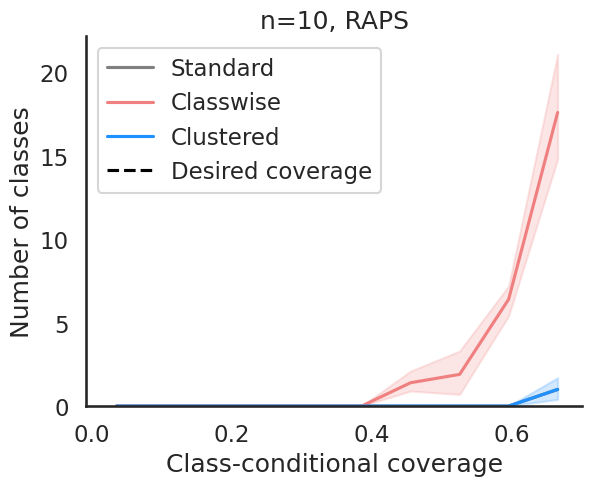

Number of seeds found: 10


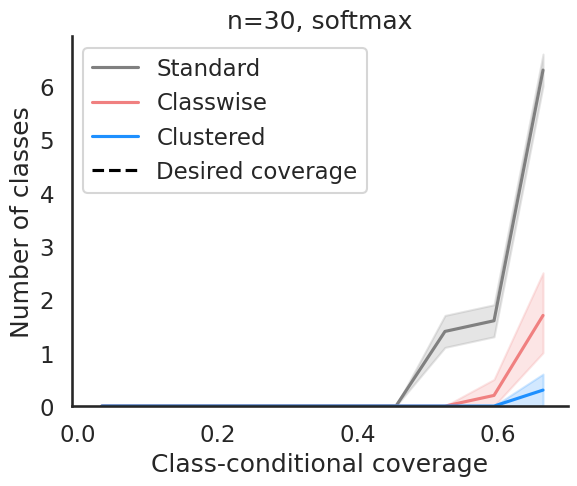

Number of seeds found: 10


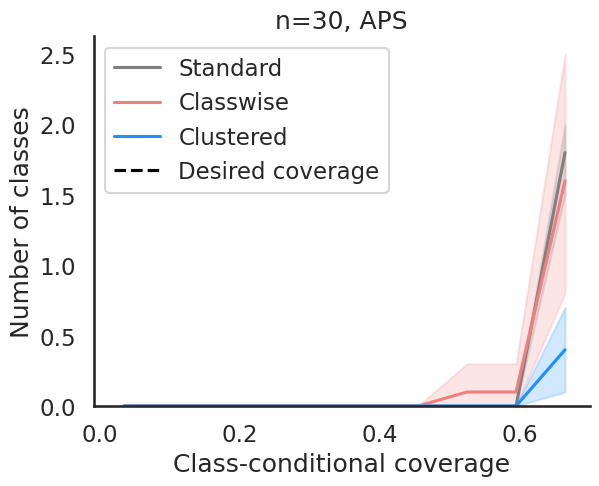

Number of seeds found: 10


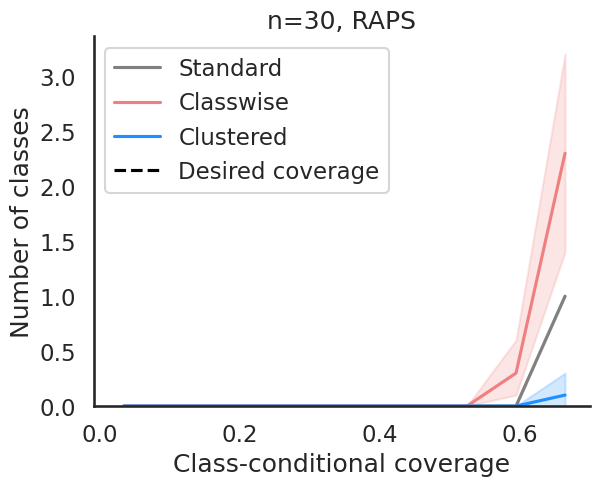

In [14]:
# Plot histograms of class coverage, focus on very undercovered classes

for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        plot_class_coverage_histogram(folder, desired_cov=1-alpha, vmin=0, vmax=.7, nbins=10, title=f'n={n_totalcal}, {score}')